In [1]:
!pip install -q kaggle   #download the library

In [2]:
from google.colab import files   #downlaod the file --kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"situkumari","key":"f6eb51bb12c42b918773c2d37bf69175"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [5]:
import tensorflow as tf
(X_train , Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape:{X_train.shape},Test shape:{X_test.shape}")   #LOADED THE DATA

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape:(60000, 28, 28),Test shape:(10000, 28, 28)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1 ,28,28,1)
X_test = X_test.reshape(-1 ,28,28,1)      #make all the images in a similar way and forming consistent data
print(f"Train reshaped:{X_train.shape}")


Train reshaped:(60000, 28, 28, 1)


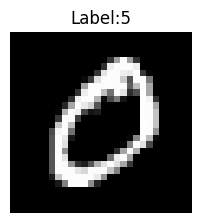

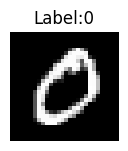

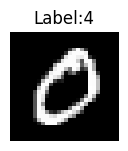

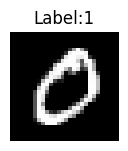

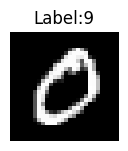

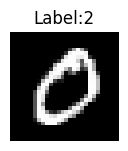

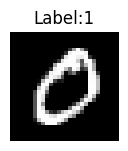

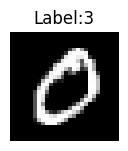

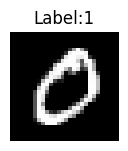

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[1].reshape(28,28),cmap = 'gray')
  plt.title(f"Label:{Y_train[i]}")
  plt.axis('off')
  plt.show()

In [8]:
(X_train_c10,Y_train_c10),(X_test_c10,Y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10/255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)), #train 32 patterns
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),  #now train 64 patterns
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8928 - loss: 0.3441 - val_accuracy: 0.9834 - val_loss: 0.0577
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9872 - val_loss: 0.0419
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9851 - val_loss: 0.0517
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0358


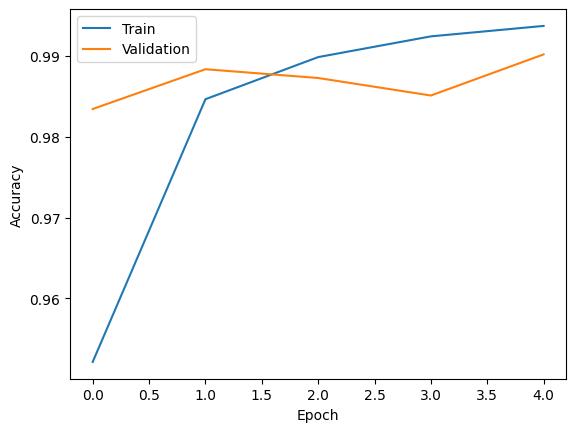

In [11]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [12]:
#now we will test and check the accuracy
test_loss,test_acc=model.evaluate(X_test,Y_test)
print("Test Accuracy:{test_acc:4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0384
Test Accuracy:{test_acc:4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [13]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)), #train 32 patterns
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),  #now train 64 patterns
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,            #we can make more images by rotating , shifting , different angles etc.
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train_c10)

In [15]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')


   ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,Y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,Y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.2905 - loss: 1.9124 - val_accuracy: 0.5154 - val_loss: 1.3539
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4486 - loss: 1.5198 - val_accuracy: 0.5328 - val_loss: 1.3058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5058 - loss: 1.3818 - val_accuracy: 0.4514 - val_loss: 1.7801
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5383 - loss: 1.3165 - val_accuracy: 0.5728 - val_loss: 1.2448
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5524 - loss: 1.2699 - val_accuracy: 0.6278 - val_loss: 1.0633
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5683 - loss: 1.2381 - val_accuracy: 0.6475 - val_loss: 1.0162
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5799 - loss: 1.2022 - val_accuracy: 0.6675 - val_loss: 0.9720
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5871 - loss: 1.18

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.66      0.92      0.77      1000
           2       0.65      0.50      0.57      1000
           3       0.61      0.35      0.45      1000
           4       0.74      0.45      0.56      1000
           5       0.60      0.64      0.62      1000
           6       0.69      0.80      0.74      1000
           7       0.61      0.81      0.70      1000
           8       0.84      0.75      0.79      1000
           9       0.70      0.75      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.66     10000
weighted avg       0.68      0.68      0.66     10000



<function matplotlib.pyplot.show(close=None, block=None)>

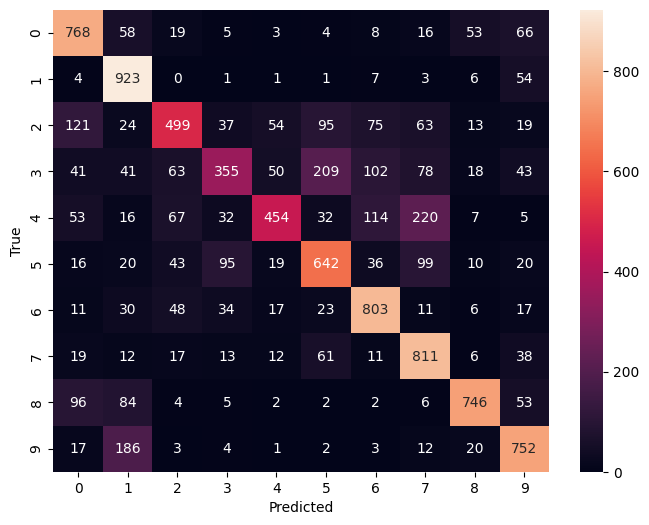

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(Y_test_c10,y_pred_c10)
print(classification_report(Y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [17]:
#we are going to use pre-trained dataset


In [18]:
!kaggle datasets download -d tongpython/cat-and-dog #give me data of cat and dog dataset

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 98% 214M/218M [00:00<00:00, 333MB/s] 
100% 218M/218M [00:00<00:00, 363MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D , Dense


base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 228s 896ms/step - accuracy: 0.7882 - loss: 0.5568 - val_accuracy: 0.7985 - val_loss: 0.5130
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 234s 935ms/step - accuracy: 0.8017 - loss: 0.4994 - val_accuracy: 0.7985 - val_loss: 0.5123
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 230s 917ms/step - accuracy: 0.7992 - loss: 0.4854 - val_accuracy: 0.7985 - val_loss: 0.5144
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 224s 892ms/step - accuracy: 0.7945 - loss: 0.4786 - val_accuracy: 0.7985 - val_loss: 0.5186
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 230s 916ms/step - accuracy: 0.8083 - loss: 0.4435 - val_accuracy: 0.7985 - val_loss: 0.5378


In [22]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 857s 3s/step - accuracy: 0.7911 - loss: 0.5005 - val_accuracy: 0.7985 - val_loss: 0.5314
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 817s 3s/step - accuracy: 0.7996 - loss: 0.4620 - val_accuracy: 0.7985 - val_loss: 0.5295
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 823s 3s/step - accuracy: 0.8077 - loss: 0.4240 - val_accuracy: 0.7975 - val_loss: 0.5273


In [23]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 663ms/step


/tmp/ipython-input-979320474.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


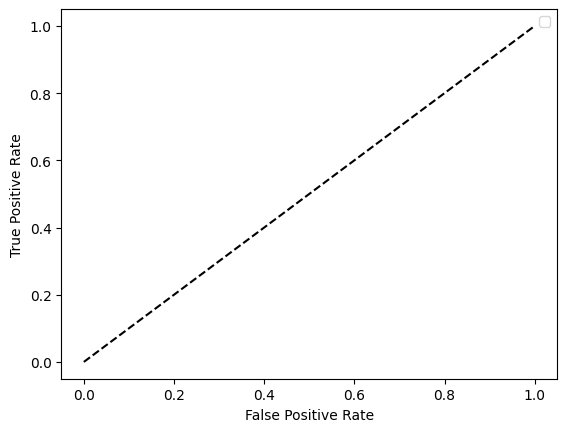

In [24]:
from sklearn.metrics import roc_curve,auc # auc = area under the curve
y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)   # fpr = False Positive Rate , tpr = True Positive Rate
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')   # roc testing ur model at every possible decisions and separate the cat from dog
                                    #auc --it tells that how good the separation is....
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [28]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'cat.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
prediction = loaded_model.predict(img_array)
print("Predicted class:", "Cat" if prediction[0][0] > 0.5 else "Dog")

Saving cat.jpg to cat (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: Cat


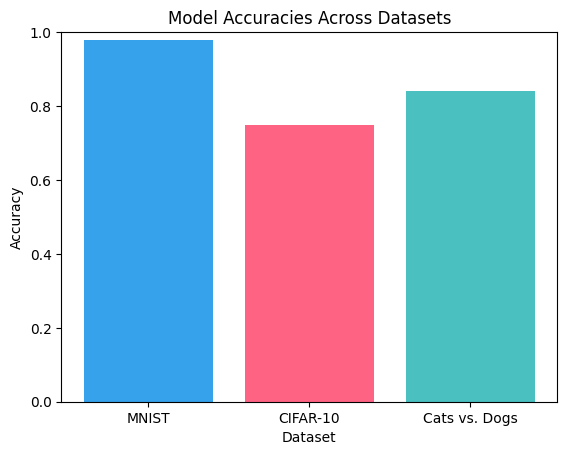

In [27]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

